<a href="https://colab.research.google.com/github/jmacedo91/Exploratory-Data-Analysis/blob/main/02_Data_Analysis_Produ%C3%A7%C3%A3o_de_Petr%C3%B3leo_e_G%C3%A1s_Natural_por_Estado_e_Localiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=darkgreen size=6>🛢️ Produção de Petróleo por Estado e Localização - (1997 - 2021) 🛢️</font>
***

<img src='https://emc.acidadeon.com/dbimagens/posto_1024x576_06072021170954.jpg' width= 70%>

# <font color=black>1. Conhecendo os dados</font>
***

<p align=justify>As informações foram disponibilizadas pela Agência Nacional do Petróleo, Gás Natural e Biocombustíveis através do <a href='https://dados.gov.br/dataset/a-producao-de-petroleo-e-gas-natural-por-estado-e-localizacao'>
Portal Brasileiro de Dados Abertos</a>. Os dados desse estudo apresentam a produção de petróleo em território nacional no período de 1997 até 2021.</p>

### <font color=black>Importando as bibliotecas</font>
***

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_palette('Accent')
sns.set_style('whitegrid')
#sns.set_context("talk")

import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (18, 7.5))


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### <font color=black>Importando os dados</font>
***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/01 - Portfólio - Data Science/001 - Exploratory Data Analysis/Datasets/producao-petroleo-m3-1997-2022.csv', sep=';', decimal=',')

### <font color=black>Tratando os dados</font>
***

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ANO                   6864 non-null   int64  
 1   MÊS                   6864 non-null   object 
 2   GRANDE REGIÃO         6864 non-null   object 
 3   UNIDADE DA FEDERAÇÃO  6864 non-null   object 
 4   PRODUTO               6864 non-null   object 
 5   LOCALIZAÇÃO           6864 non-null   object 
 6   PRODUÇÃO              6864 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 375.5+ KB


In [ ]:
dados['PRODUÇÃO'].astype(float)

0       2767443.0
1       2891003.0
2       2998305.0
3       2863184.0
4       2873644.0
          ...    
6859          0.0
6860          0.0
6861          0.0
6862          0.0
6863          0.0
Name: PRODUÇÃO, Length: 6864, dtype: float64

In [ ]:
colunas = []
for i in dados.columns:
  colunas.append(i.capitalize())
dados.columns = colunas

In [ ]:
dados.head()

,Ano,Mês,Grande região,Unidade da federação,Produto,Localização,Produção
0,1997,JAN,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2767443.0
1,1997,FEV,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2891003.0
2,1997,MAR,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2998305.0
3,1997,ABR,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2863184.0
4,1997,MAI,REGIÃO SUDESTE,RIO DE JANEIRO,PETRÓLEO,MAR,2873644.0


In [ ]:
def formata(coluna):
  formatacao = []
  for i in coluna:
    formatacao.append(i.capitalize())
  coluna = formatacao
  return coluna

In [ ]:
for i in dados.columns[1:6]:
  dados[i] = formata(dados[i])

In [ ]:
dados.head()

,Ano,Mês,Grande região,Unidade da federação,Produto,Localização,Produção
0,1997,Jan,Região sudeste,Rio de janeiro,Petróleo,Mar,2767443.0
1,1997,Fev,Região sudeste,Rio de janeiro,Petróleo,Mar,2891003.0
2,1997,Mar,Região sudeste,Rio de janeiro,Petróleo,Mar,2998305.0
3,1997,Abr,Região sudeste,Rio de janeiro,Petróleo,Mar,2863184.0
4,1997,Mai,Região sudeste,Rio de janeiro,Petróleo,Mar,2873644.0


In [ ]:
dados.tail()

,Ano,Mês,Grande região,Unidade da federação,Produto,Localização,Produção
6859,2022,Ago,Região sudeste,Espírito santo,Petróleo,Terra,0.0
6860,2022,Set,Região sudeste,Espírito santo,Petróleo,Terra,0.0
6861,2022,Out,Região sudeste,Espírito santo,Petróleo,Terra,0.0
6862,2022,Nov,Região sudeste,Espírito santo,Petróleo,Terra,0.0
6863,2022,Dez,Região sudeste,Espírito santo,Petróleo,Terra,0.0


Como o ano de 2022 não possui todos os registros, vamos utilizar os dados até 2021.

In [ ]:
dados = dados.query("Ano < 2022")

Vamos eliminar a coluna 'Produto', pois é um dado único e obsoleto em nossa análise.

In [ ]:
dados['Produto'].unique()

array(['Petróleo'], dtype=object)

In [ ]:
dados.drop(['Produto'], axis=1, inplace=True)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6600 entries, 0 to 6599
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   6600 non-null   int64  
 1   Mês                   6600 non-null   object 
 2   Grande região         6600 non-null   object 
 3   Unidade da federação  6600 non-null   object 
 4   Localização           6600 non-null   object 
 5   Produção              6600 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 360.9+ KB


# <font color=black>2. Explorando os Dados</font>
***

## <font color=black>2.1 Produção Nacional Anual</font>
***

In [ ]:
dados['Ano'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

O levantamento foi realizado entre os anos de 1997 e 2021. Os dados são atualizados mensalmente até o último dia do mês subsequente ao mês de referência.

### <font color=black>Evolução da Produção Nacional</font>
***

Podemos sugerir questionamentos em relação aos anos que apresentaram maior produção de petróleo no Brasil.

In [ ]:
producao_anual = pd.DataFrame(dados['Produção'].groupby(dados['Ano']).sum())
producao_anual.reset_index(inplace = True)

In [ ]:
producao_anual

,Ano,Produção
0,1997,4.864731e+07
1,1998,5.638555e+07
2,1999,6.371768e+07
3,2000,7.164369e+07
4,2001,7.501996e+07
5,2002,8.439897e+07
6,2003,8.681970e+07
7,2004,8.596698e+07
8,2005,9.479673e+07
9,2006,9.997061e+07


In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'center', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

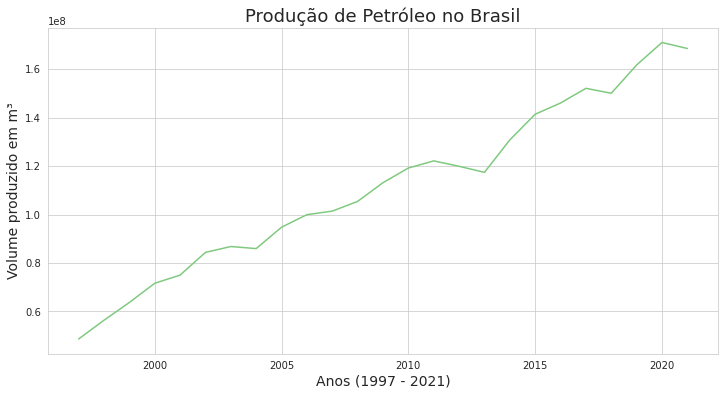

In [ ]:
plotar('Produção de Petróleo no Brasil', 'Anos (1997 - 2021)', 'Volume produzido em m³', 'Ano', 'Produção', producao_anual)

Percebemos um crescimento quase linear na produção de Gás Natural e Petróleo nos últimos 25 anos, vamos analisar quais os períodos que apresentaram déficit ou superávit

In [ ]:
producao_anual['Aumento'] = producao_anual['Produção'].diff()
producao_anual

,Ano,Produção,Aumento
0,1997,4.864731e+07,NaN
1,1998,5.638555e+07,7.738242e+06
2,1999,6.371768e+07,7.332129e+06
3,2000,7.164369e+07,7.926014e+06
4,2001,7.501996e+07,3.376267e+06
5,2002,8.439897e+07,9.379005e+06
6,2003,8.681970e+07,2.420731e+06
7,2004,8.596698e+07,-8.527176e+05
8,2005,9.479673e+07,8.829754e+06
9,2006,9.997061e+07,5.173880e+06


In [ ]:
def plotar_crescimento(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'center', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax.hlines(y = 0, xmin = 1997, xmax = 2021, colors='k', linestyles='dashed')
  ax = ax

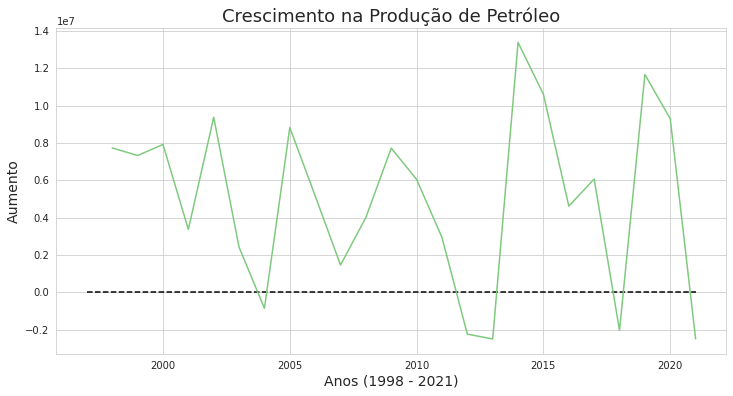

In [ ]:
plotar_crescimento('Crescimento na Produção de Petróleo', 'Anos (1998 - 2021)', 'Aumento', 'Ano', 'Aumento', producao_anual)

### <font color=black>Aceleração da Produção Anual</font>
***

In [ ]:
producao_anual['Aceleração'] = producao_anual['Aumento'].diff()
producao_anual

,Ano,Produção,Aumento,Aceleração
0,1997,4.864731e+07,NaN,NaN
1,1998,5.638555e+07,7.738242e+06,NaN
2,1999,6.371768e+07,7.332129e+06,-4.061128e+05
3,2000,7.164369e+07,7.926014e+06,5.938848e+05
4,2001,7.501996e+07,3.376267e+06,-4.549747e+06
5,2002,8.439897e+07,9.379005e+06,6.002737e+06
6,2003,8.681970e+07,2.420731e+06,-6.958274e+06
7,2004,8.596698e+07,-8.527176e+05,-3.273449e+06
8,2005,9.479673e+07,8.829754e+06,9.682472e+06
9,2006,9.997061e+07,5.173880e+06,-3.655875e+06


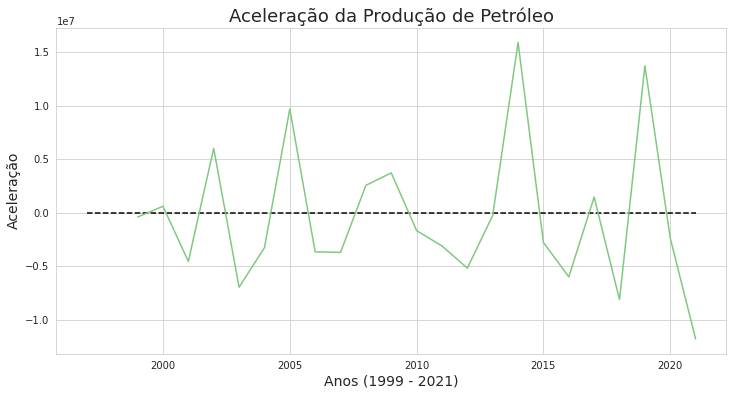

In [ ]:
plotar_crescimento('Aceleração da Produção de Petróleo', 'Anos (1999 - 2021)', 'Aceleração', 'Ano', 'Aceleração', producao_anual)

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'center')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.hlines(y = 0, xmin = 1997, xmax = 2021, colors='k', linestyles='dashed')
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  plt.hlines(y = 0, xmin = 1997, xmax = 2021, colors='k', linestyles='dashed')
  ax = ax

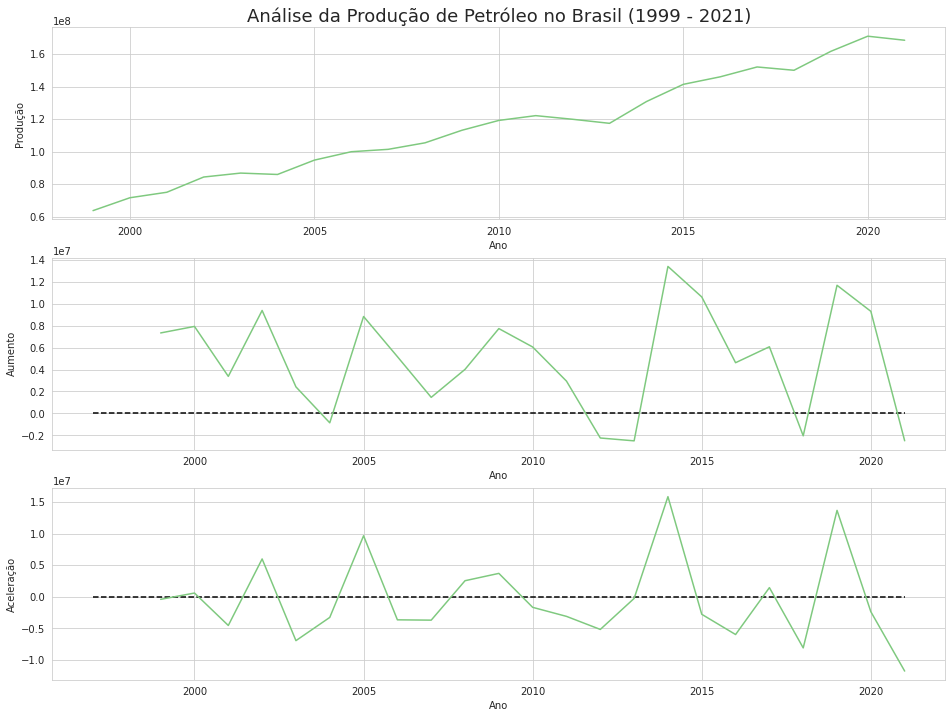

In [ ]:
plot_comparacao(producao_anual['Ano'][2:], 'Produção', 'Aumento', 'Aceleração', producao_anual, 'Análise da Produção de Petróleo no Brasil (1999 - 2021)')

### <font color=black>Estimativas para 2022</font>
***

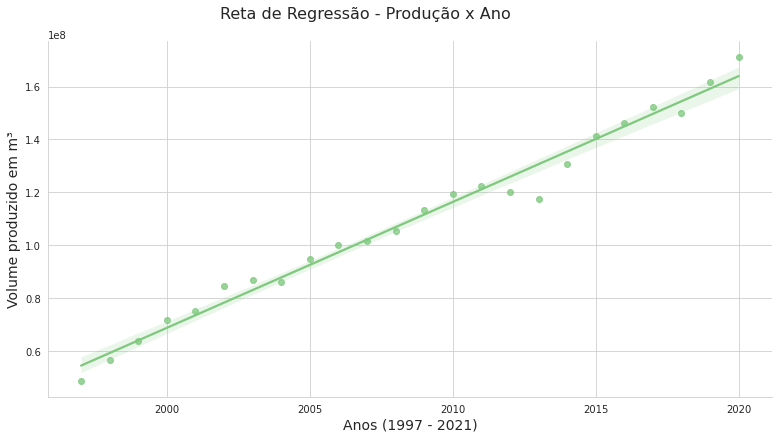

In [ ]:
ax = sns.lmplot(x= 'Ano', y= 'Produção', data = producao_anual[:-1])
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Produção x Ano', fontsize=16, y=1.02)
ax.set_xlabels('Anos (1997 - 2021)', fontsize=14)
ax.set_ylabels('Volume produzido em m³', fontsize=14)
ax = ax

In [ ]:
producao_anual[['Ano', 'Produção']].corr()

,Ano,Produção
Ano,1.000000,0.992474
Produção,0.992474,1.000000


Percebemos que a correlação entre os anos que passam e a produção da Gás Natural e Petróleo é muito forte (correlação = 0.992). Podemos criar um modelo preditivo para sugerir a produção dos próximos anos.

### Preparando os dados para estimar um modelo de regressão linear simples.

In [ ]:
Y = producao_anual['Produção']
X = sm.add_constant(producao_anual['Ano'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
resultado_regressao = sm.OLS(Y, X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               Produção   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1511.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           1.75e-22
Time:                        11:18:29   Log-Likelihood:                -416.97
No. Observations:                  25   AIC:                             837.9
Df Residuals:                      23   BIC:                             840.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.461e+09   2.46e+08    -38.417      0.0

### Obtendo o $Y$ previsto

In [ ]:
producao_anual['Y_previsto'] = resultado_regressao.predict()

In [ ]:
producao_anual.head()

,Ano,Produção,Aumento,Aceleração,Y_previsto
0,1997,48647309.00,NaN,NaN,5.435467e+07
1,1998,56385551.00,7738242.00,NaN,5.911930e+07
2,1999,63717680.24,7332129.24,-406112.76,6.388393e+07
3,2000,71643694.29,7926014.05,593884.81,6.864856e+07
4,2001,75019961.65,3376267.36,-4549746.69,7.341319e+07


### Calculando os Resíduos $u$

In [ ]:
producao_anual['Resíduo'] = resultado_regressao.resid

In [ ]:
producao_anual.head()

,Ano,Produção,Aumento,Aceleração,Y_previsto,Resíduo
0,1997,48647309.00,NaN,NaN,5.435467e+07,-5.707361e+06
1,1998,56385551.00,7738242.00,NaN,5.911930e+07,-2.733749e+06
2,1999,63717680.24,7332129.24,-406112.76,6.388393e+07,-1.662509e+05
3,2000,71643694.29,7926014.05,593884.81,6.864856e+07,2.995132e+06
4,2001,75019961.65,3376267.36,-4549746.69,7.341319e+07,1.606769e+06


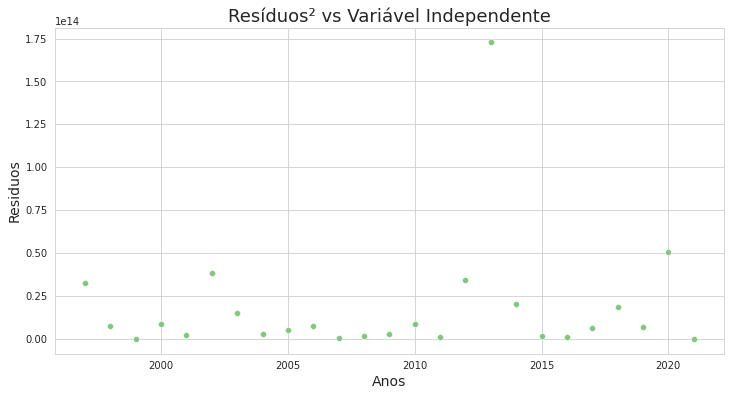

In [ ]:
ax = sns.scatterplot(x = producao_anual.Ano, y = producao_anual.Resíduo**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Variável Independente', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax.set_ylabel('Residuos', fontsize = 14)
ax = ax

Com exceção do ponto em 2013, percebemos que há homogeneidade nos valores de variância, assumindo um erro quase constante.

### Qual seria a produção de Petróleo para o ano de 2022? E para 2030?

In [ ]:
resultado_regressao.params

const   -9.460613e+09
Ano      4.764631e+06
dtype: float64

In [ ]:
beta1 = resultado_regressao.params[0]
beta2 = resultado_regressao.params[1]

In [ ]:
def producao(ano):
  producao_prevista = beta1 + (beta2 * ano)
  return producao_prevista

In [ ]:
print(f'A produção de Petróleo prevista para 2022 é de {round(producao(2022))} m³')

A produção de Petróleo prevista para 2022 é de 173470439 m³


In [ ]:
print(f'A produção de Petróleo prevista para 2030 é de {round(producao(2030))} m³')

A produção de Petróleo prevista para 2030 é de 211587485 m³


## <font color=black>2.2 Produção Regional</font>
***

Vamos explorar a produção nacional utilizando o critério regional nesse tópico.

In [ ]:
dados['Grande região'].unique()

array(['Região sudeste', 'Região norte', 'Região sul', 'Região nordeste'],
      dtype=object)

In [ ]:
producao_regional = pd.DataFrame(dados['Produção'].groupby(dados['Grande região']).sum().sort_values(ascending=False))
producao_regional.reset_index(inplace=True)

In [ ]:
producao_regional

,Grande região,Produção
0,Região sudeste,2.516370e+09
1,Região nordeste,2.229195e+08
2,Região norte,4.537236e+07
3,Região sul,3.594130e+06


In [ ]:
producao_regional['Percentual'] = [(100 * i / producao_regional['Produção'].sum()) for i in producao_regional['Produção']]
producao_regional['Percentual'] = round(producao_regional['Percentual'], 2)

In [ ]:
producao_regional

,Grande região,Produção,Percentual
0,Região sudeste,2.516370e+09,90.25
1,Região nordeste,2.229195e+08,7.99
2,Região norte,4.537236e+07,1.63
3,Região sul,3.594130e+06,0.13


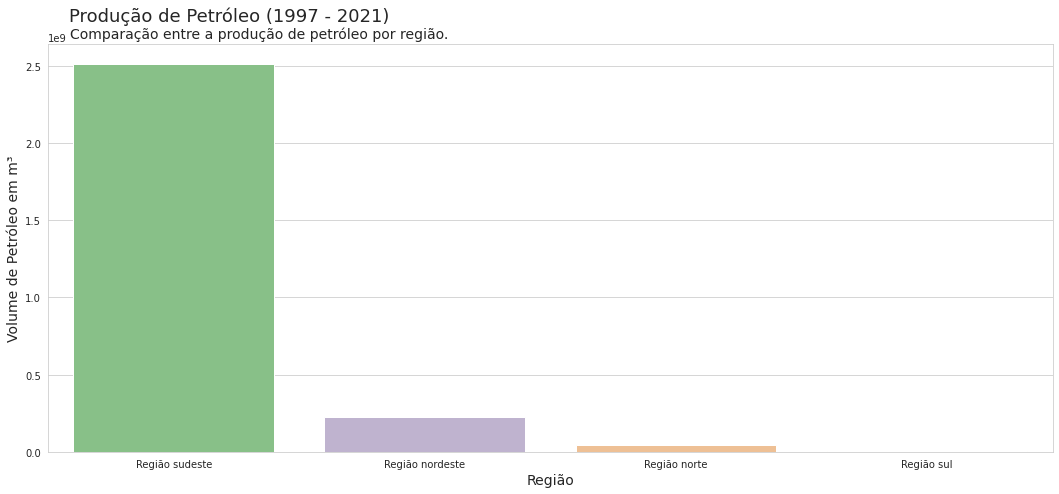

In [ ]:
ax = sns.barplot(x = producao_regional['Grande região'], y = producao_regional['Produção'], data = producao_regional)
plt.suptitle('Produção de Petróleo (1997 - 2021)', x = 0.265, y = 0.95, fontsize = 18)
plt.title('Comparação entre a produção de petróleo por região.', x = 0.21, y = 1.0, fontsize = 14)
ax.figure.set_size_inches(18, 7.5)
ax.set_xlabel('Região', fontsize = 14)
ax.set_ylabel('Volume de Petróleo em m³', fontsize = 14)
ax = ax

Os dados demonstram que 90% da produção total de petróleo dos últimos 24 anos é proveniente da região Sudeste. Esse fato deve-se à região possuir as maiores bacias petrolíferas do país, entre elas a Bacia de Campos, a Bacia de Santos e a Bacia do Espírito Santo.

### <font color=black>Evolução da Produção Regional</font>
***

Podemos acompanhar a evolução da produção regional ao longo do período de 1997 a 2021.

In [ ]:
def evolucao_regional(regiao, dataset):
  selecao = dados['Grande região'].isin(regiao)
  dados_regionais = dados[selecao]
  return dados_regionais

In [ ]:
dados_sudeste = evolucao_regional(['Região sudeste'], dados)
dados_nordeste = evolucao_regional(['Região nordeste'], dados)
dados_norte = evolucao_regional(['Região norte'], dados)
dados_sul = evolucao_regional(['Região sul'], dados)

#### <font color=black>Região Sudeste</font>
***

In [ ]:
producao_anual_sudeste = pd.DataFrame(dados_sudeste.groupby('Ano')['Produção'].sum())

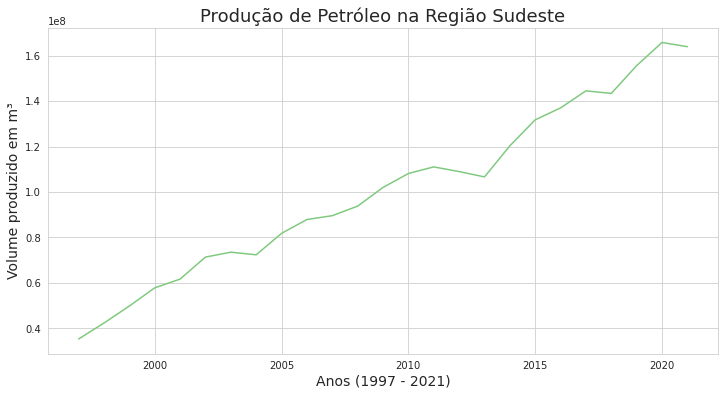

In [ ]:
plotar('Produção de Petróleo na Região Sudeste', 'Anos (1997 - 2021)', 'Volume produzido em m³', 'Ano', 'Produção', producao_anual_sudeste)

#### <font color=black>Região Nordeste</font>
***

In [ ]:
producao_anual_nordeste = pd.DataFrame(dados_nordeste.groupby('Ano')['Produção'].sum())

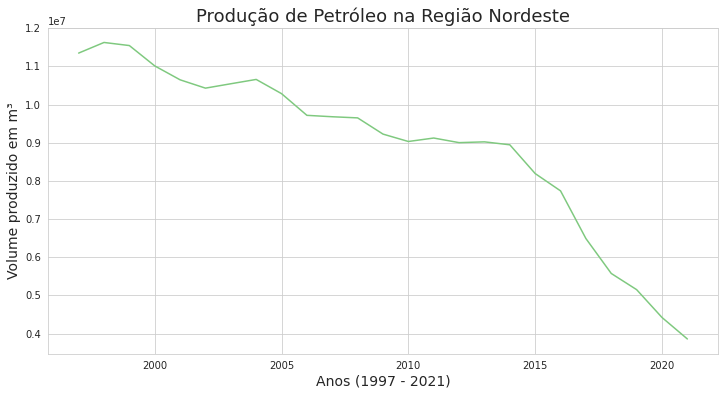

In [ ]:
plotar('Produção de Petróleo na Região Nordeste', 'Anos (1997 - 2021)', 'Volume produzido em m³', 'Ano', 'Produção', producao_anual_nordeste)

#### <font color=black>Região Norte</font>
***

In [ ]:
producao_anual_norte = pd.DataFrame(dados_norte.groupby('Ano')['Produção'].sum())

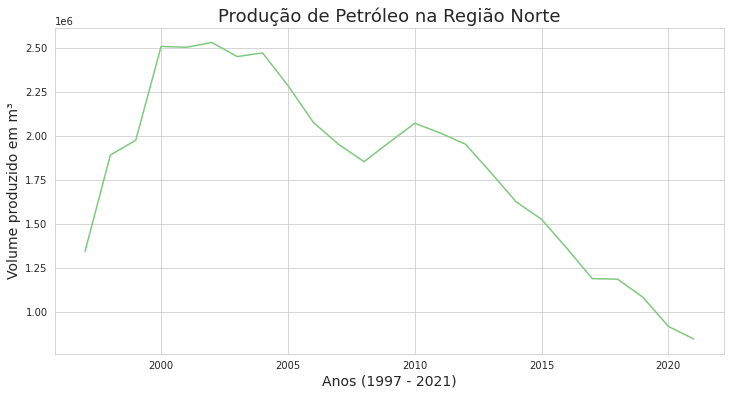

In [ ]:
plotar('Produção de Petróleo na Região Norte', 'Anos (1997 - 2021)', 'Volume produzido em m³', 'Ano', 'Produção', producao_anual_norte)

#### <font color=black>Região Sul</font>
***

In [ ]:
producao_anual_sul = pd.DataFrame(dados_sul.groupby('Ano')['Produção'].sum())

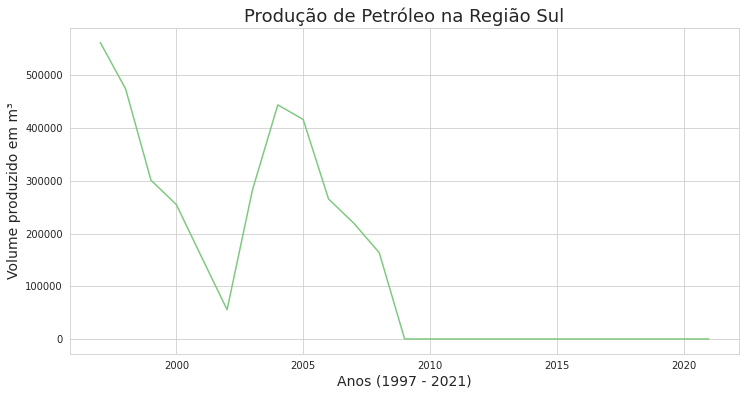

In [ ]:
plotar('Produção de Petróleo na Região Sul', 'Anos (1997 - 2021)', 'Volume produzido em m³', 'Ano', 'Produção', producao_anual_sul)

In [ ]:
producao_anual_sul

,Produção
Ano,
1997,562325.0
1998,474269.0
1999,301054.0
2000,254860.0
2001,154833.0
2002,55530.0
2003,282496.0
2004,443987.0
2005,416338.0
